In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plot settings
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size

### Accuracy as a function of Dataset size

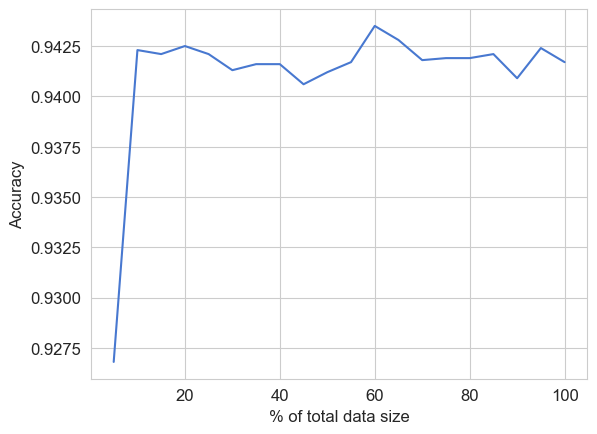

In [6]:
accuracy = np.load('Results/results_accuracy_sentence.npy')
numbers = np.arange(5, 101, 5)

plt.plot(numbers, accuracy)
plt.xlabel(r'% of total data size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Accuracy as a function of Chunk Size and Dataset Size

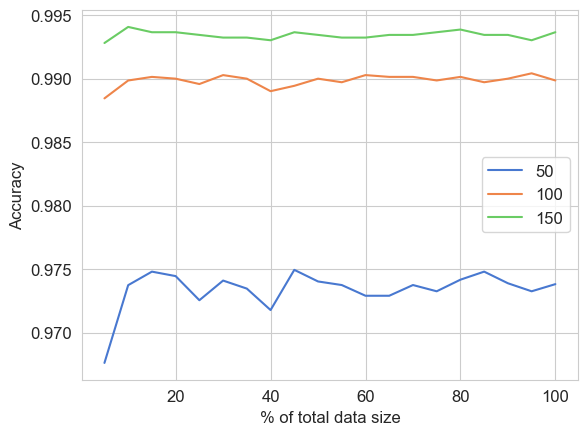

In [9]:
accuracy = np.load('Results/accuracy_chunk_sizes.npy')
numbers = np.arange(5, 101, 5)
chunk_sizes = ['50', '100', '150']

for idx, acc in enumerate(accuracy):
    plt.plot(numbers, acc, label=chunk_sizes[idx])
plt.xlabel(r'% of total data size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize='large', loc='center right')
plt.show()

### Accuracy of Neural Net with PCA reduction as a function of the number of components

#### Chunk Size 150

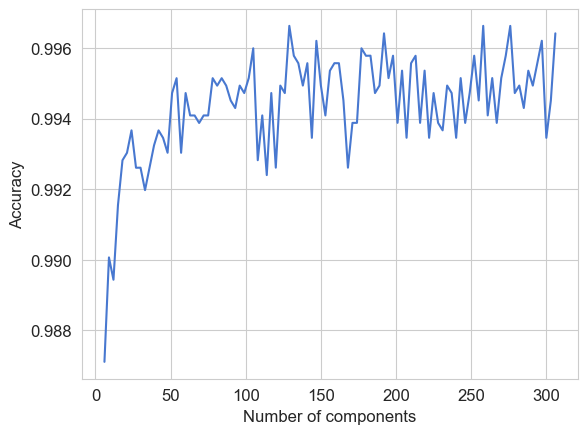

In [12]:
accuracy = np.load('Results/accuracy_pca_reduction_150_chunk.npy')
numbers = np.arange(6, 307, 3)

plt.plot(numbers, accuracy)
plt.xlabel(r'Number of components', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

#### Sentences

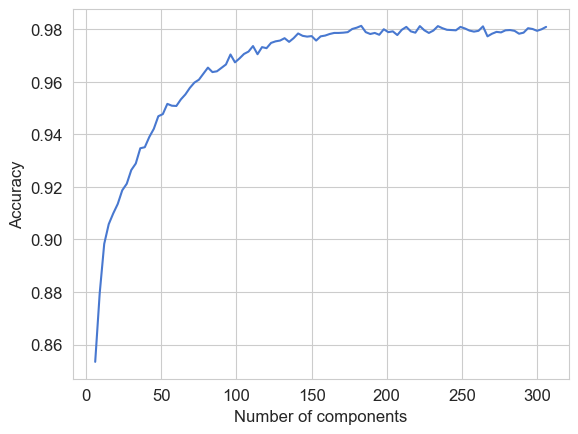

In [11]:
accuracy = np.load('Results/accuracy_pca_reduction_sentences.npy')
numbers = np.arange(6, 307, 3)

plt.plot(numbers, accuracy)
plt.xlabel(r'Number of components', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.show()

### Visualization of Clustering

In [1]:
import umap
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split

c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Chunk Size 150

In [4]:
#### Chunk Size 150
X_chunk = np.load('Data/text_data150.npy')
y_chunk = np.load('Data/labels150.npy')

# with labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_chunk, y=y_chunk)
umap_chunk_labels = mapper.transform(X_chunk)

# without labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_chunk)
umap_chunk = mapper.transform(X_chunk)

## PCA
mapper = PCA(n_components=2).fit(X_chunk)
pca_chunk = mapper.transform(X_chunk)

#### Sentences
X_sent = np.load('Data/text_data_sentences.npy')
y_sent = np.load('Data/labels_sentences.npy')

# with labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_sent, y=y_sent)
umap_sentences_labels = mapper.transform(X_sent)

# without labels
mapper = umap.UMAP(n_components=2,
                   random_state=3).fit(X_sent)
umap_sentences = mapper.transform(X_sent)

## PCA
mapper = PCA(n_components=2).fit(X_sent)
pca_sentences = mapper.transform(X_sent)

c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\maria\anaconda3\envs\textembedding\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\maria\AppData\Local\Temp\ipykernel_25548\3322520837.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle


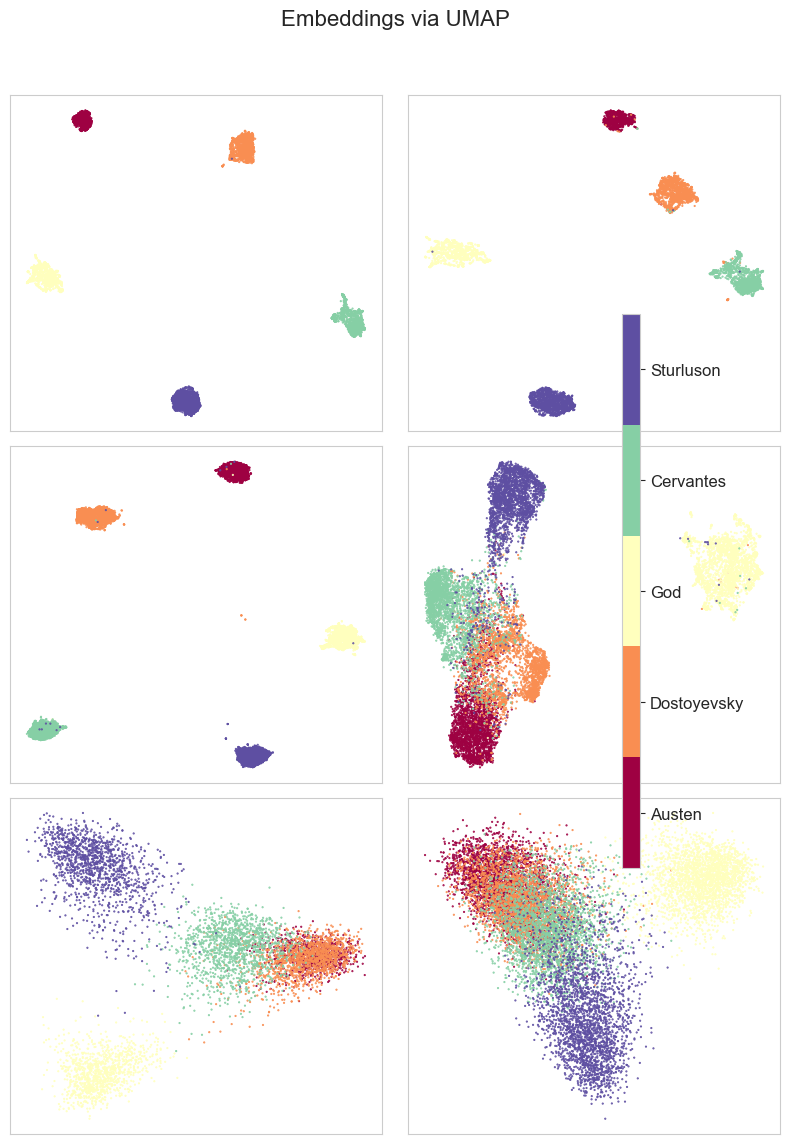

In [11]:
embedding_train_list = [umap_chunk_labels, umap_chunk, umap_sentences_labels, umap_sentences, pca_chunk, pca_sentences] 
y_list = [y_chunk, y_chunk, y_sent, y_sent, y_chunk, y_sent]
classes = ['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson']

fig, axs = plt.subplots(3, 2, figsize=(8, 12))
axs = axs.flatten() 

# Plot each embedding in a subplot
for i in range(len(embedding_train_list)):
    sc = axs[i].scatter(*embedding_train_list[i].T, s=0.3, c=y_list[i], cmap='Spectral', alpha=1.0)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
# Add a colorbar to the left, shared across all subplots
cbar = fig.colorbar(sc, ax=axs, boundaries=np.arange(len(classes) + 1) - 0.5, shrink=0.6, aspect=30)
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.suptitle('Embeddings via UMAP', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include the suptitle
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_25548\2112899464.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])  # Adjust layout to include the suptitle and provide space for colorbar


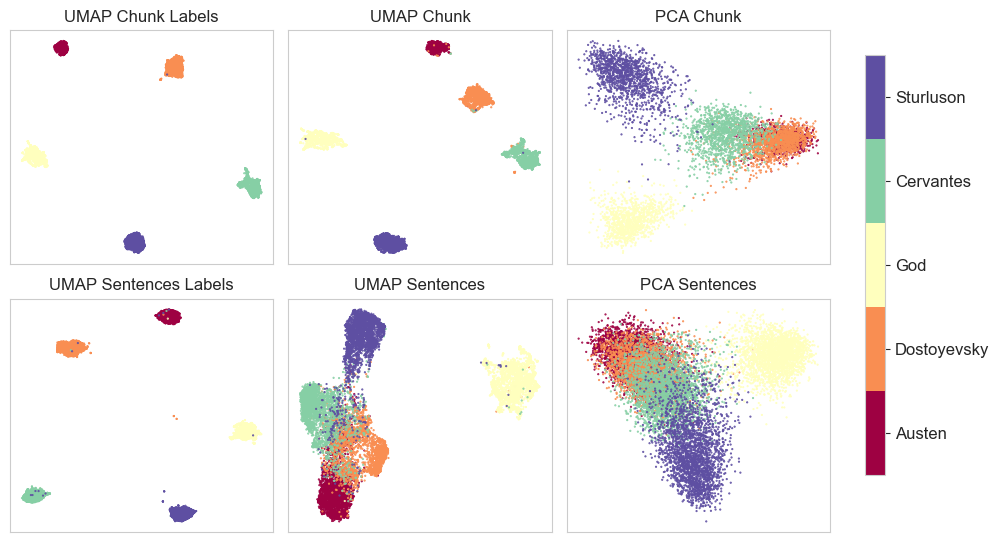

In [22]:
embedding_train_list = [umap_chunk_labels, umap_chunk, pca_chunk, umap_sentences_labels, umap_sentences, pca_sentences] 
y_list = [y_chunk, y_chunk, y_chunk, y_sent, y_sent, y_sent]

classes = ['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson']

titles = ['UMAP Chunk Labels', 'UMAP Chunk', 'PCA Chunk', 'UMAP Sentences Labels', 'UMAP Sentences', 'PCA Sentences']

fig, axs = plt.subplots(2, 3, figsize=(10, 6))  # Adjust figsize to fit new layout
axs = axs.flatten()

# Plot each embedding in a subplot
for i in range(len(embedding_train_list)):
    sc = axs[i].scatter(*embedding_train_list[i].T, s=0.3, c=y_list[i], cmap='Spectral', alpha=1.0)
    axs[i].set_title(titles[i])  # Add a title to each subplot
    axs[i].set_xticks([])
    axs[i].set_yticks([])

# Adjust layout to have more space for the colorbar on the right
plt.subplots_adjust(right=0.85, wspace=0.3)

# Add a colorbar to the right, shared across all subplots
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # Position of colorbar [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax, boundaries=np.arange(len(classes) + 1) - 0.5)
cbar.set_ticks(np.arange(len(classes)))
cbar.set_ticklabels(classes)

plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])  # Adjust layout to include the suptitle and provide space for colorbar
plt.show()


In [9]:
pca_kmeans = np.load('Results/labels_kmeans_PCA150.npy', allow_pickle=True)
pca_hdbscan = np.load('Results/labels_hdbscan_PCA150.npy', allow_pickle=True)

X = np.load('Data/text_data150.npy')
y = np.load('Data/labels150.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)

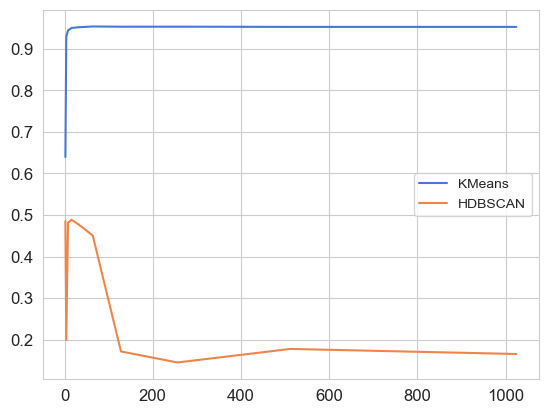

In [24]:
dimensions = 2 ** np.arange(1, 11)
adr = np.zeros(len(dimensions))
adr_hdb = np.zeros(len(dimensions))

for i in range(len(pca_kmeans)):
    adr[i] = adjusted_rand_score(y_train, pca_kmeans[i])
    adr_hdb[i] = adjusted_rand_score(y_train, pca_hdbscan[i])
plt.plot(dimensions, adr, label='KMeans')
plt.plot(dimensions, adr_hdb, label='HDBSCAN')
plt.legend()

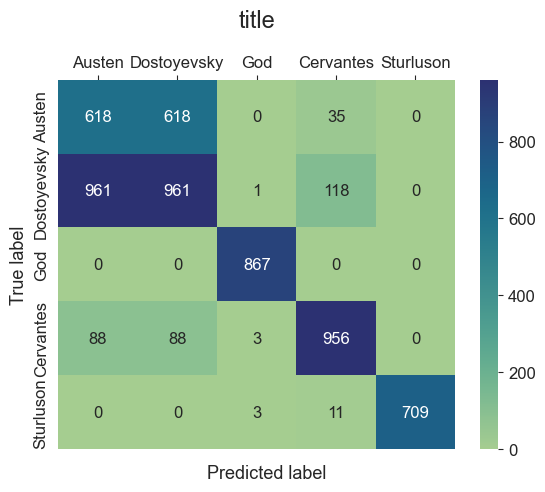

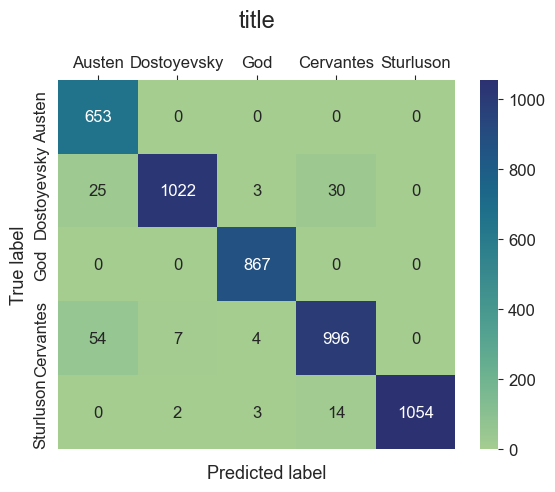

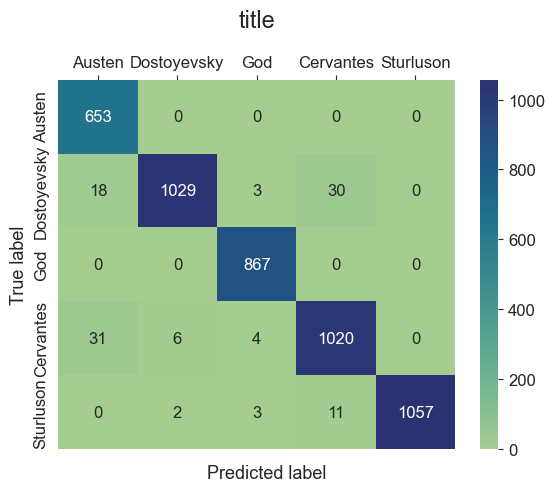

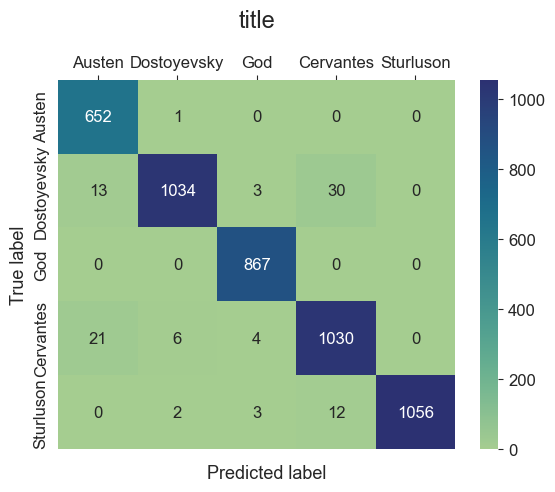

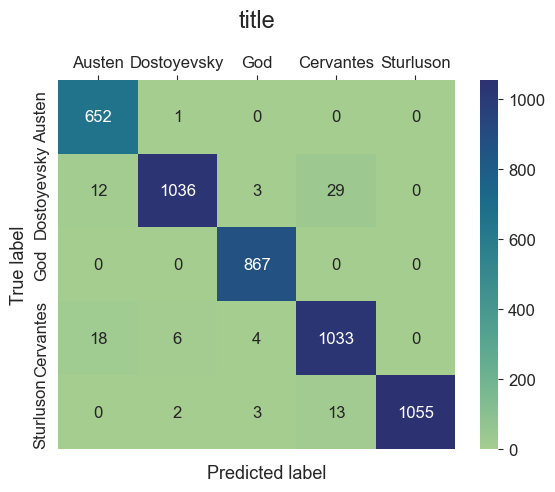

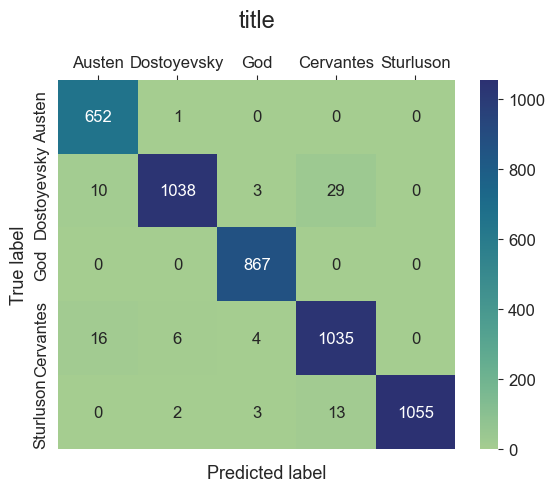

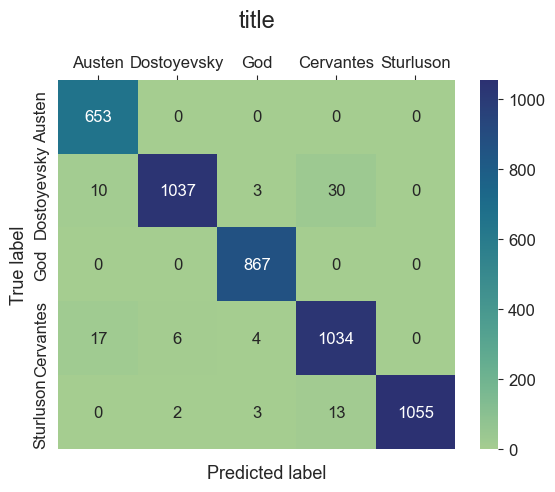

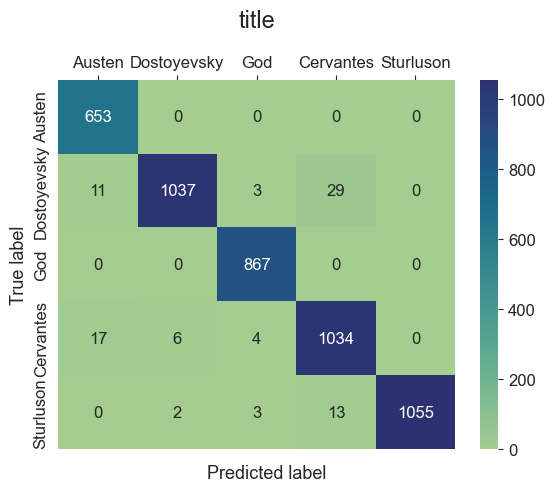

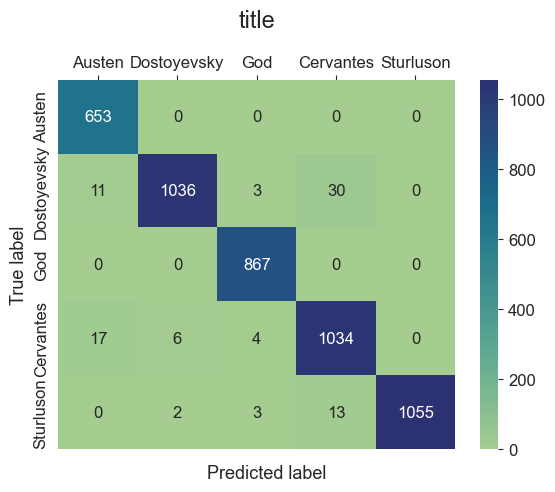

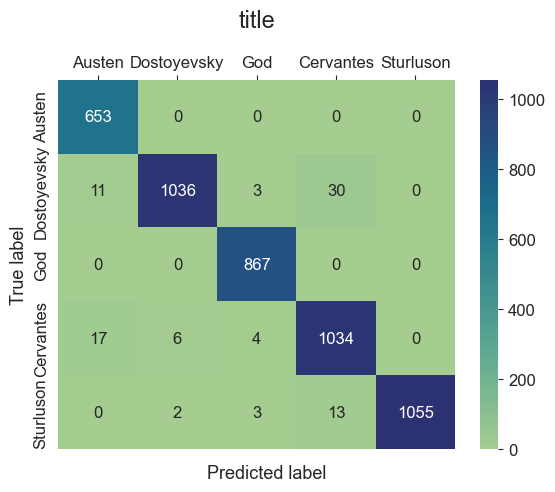

In [15]:
def sort_matrix(matrix):
    """Reorders the design matrix for ease of reading - note that no information is added"""
    return matrix[:,np.argmax(matrix, axis=1)]

def plot_confusion_matrix(cm, title):
    ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":12},
            fmt=".0f",
            xticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            yticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            cmap='crest')
    plt.ylabel('True label', fontsize=13)
    plt.title(title, fontsize=17, pad=20, loc='center')
    ax.set(xlabel="", ylabel="True label")
    ax.xaxis.tick_top()

    plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
    plt.show()

for i in range(len(pca_kmeans)):
    labels = pca_kmeans[i]
    plot_confusion_matrix(sort_matrix(confusion_matrix(y_train, labels)), 'title')


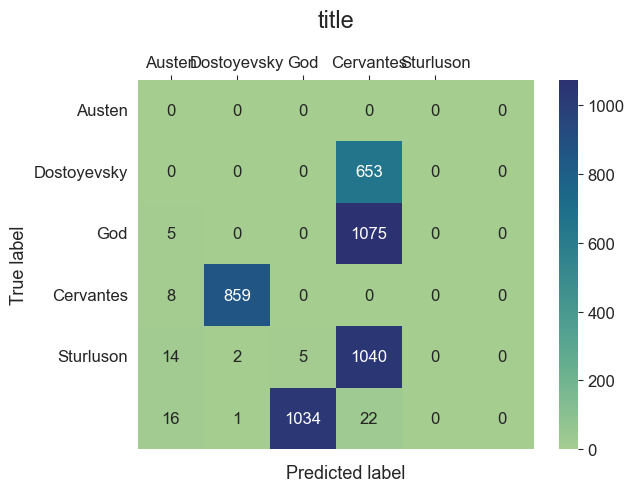

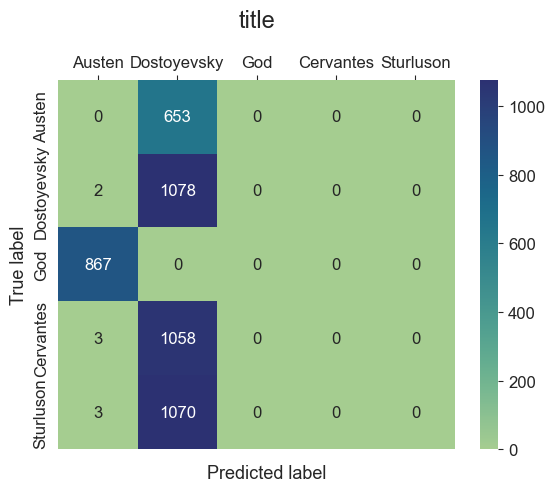

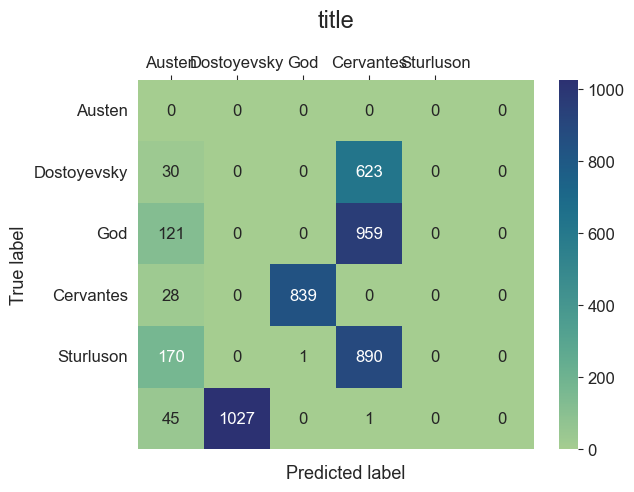

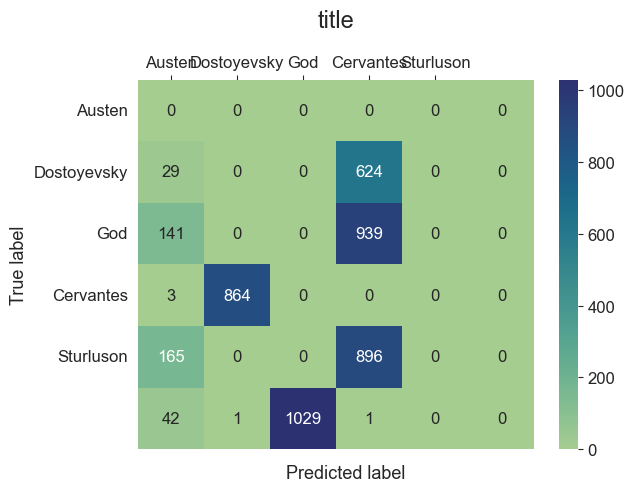

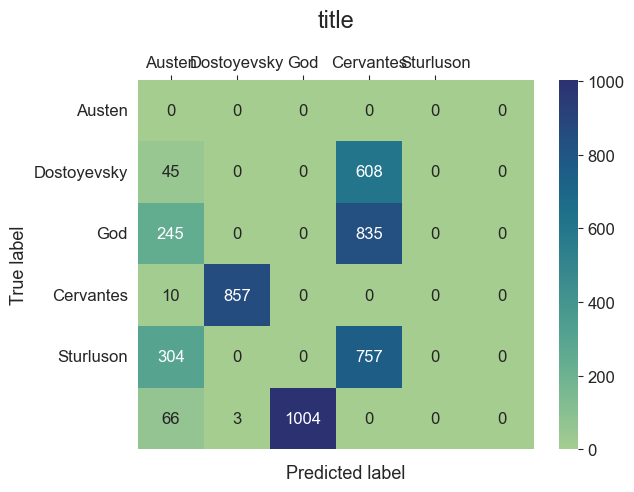

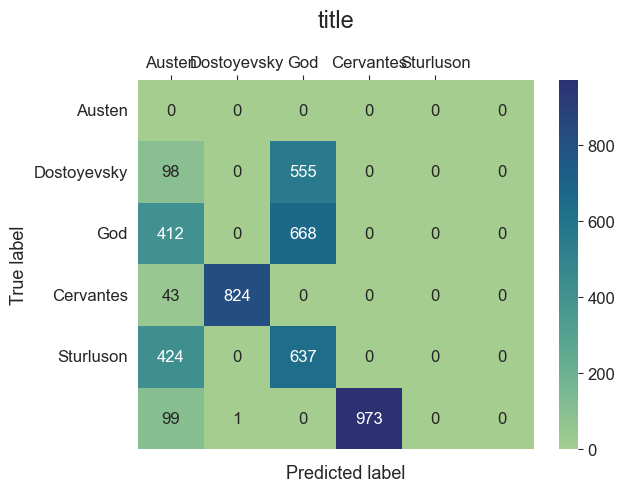

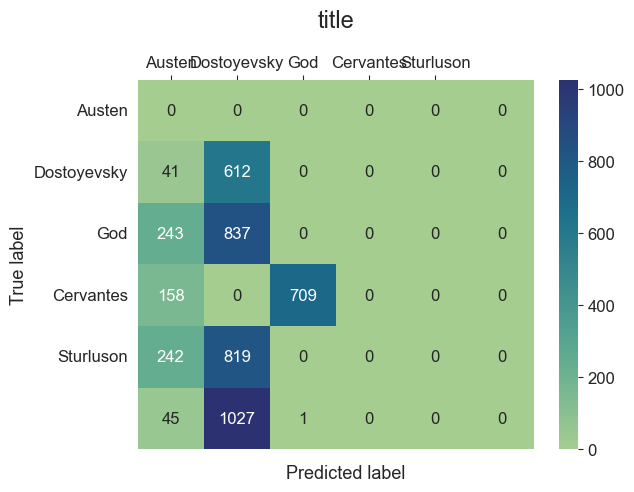

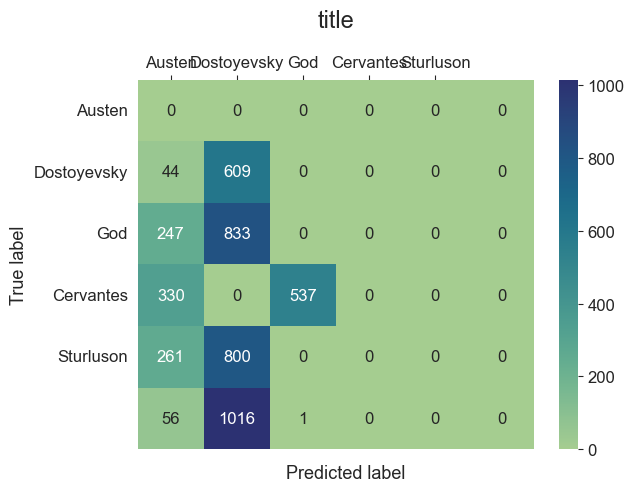

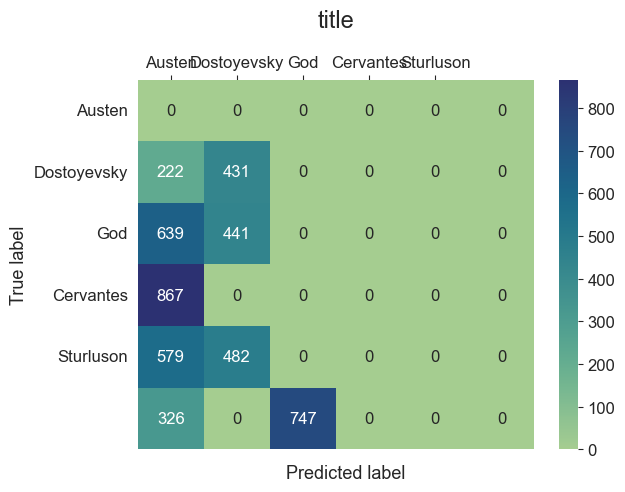

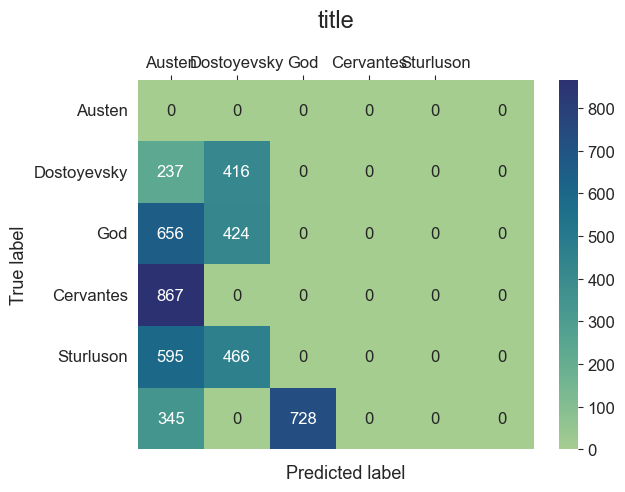

In [12]:
for i in range(len(pca_hdbscan)):
    labels = pca_hdbscan[i]
    cm = confusion_matrix(y_train, labels)

    ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":12},
            fmt=".0f",
            xticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            yticklabels=['Austen', 'Dostoyevsky', 'God', 'Cervantes', 'Sturluson'],
            cmap='crest')
    plt.ylabel('True label', fontsize=13)
    plt.title('title', fontsize=17, pad=20, loc='center')
    ax.set(xlabel="", ylabel="True label")
    ax.xaxis.tick_top()

    plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
    plt.show()

In [ ]:
dimensions = 2 ** np.arange(1, 11)

plt.plot(dimensions, pca)